# Credit Risk Modling Machine Learning Model

## Import Necessary Liberaries

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sn

## Read and Explore Dataset

In [3]:
dataset = pd.read_csv('cs-training.csv')
dataset.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
dataset.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
print("Number of Rows : ",dataset.shape[0],"\nNumber of Columns : ", dataset.shape[1])

Number of Rows :  150000 
Number of Columns :  12


In [7]:
dataset[dataset['MonthlyIncome'].isnull() == True]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149976,149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149977,149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149984,149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149992,149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [8]:
dataset[dataset['NumberOfDependents'].isnull() == True]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,97,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,110,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,160,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,239,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149826,149827,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,149855,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,149895,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,149949,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


## Data Cleaning

### 1. Cleaning MonthlyIncome Parameter

In [9]:
dataset['MonthlyIncome'].value_counts().to_csv('MonthlyIncome.csv')
income_dataset = pd.read_csv('MonthlyIncome.csv')
income_dataset.columns = ['Income', 'Occurance']
income_dataset.head()

,Income,Occurance
0,5000.0,2757
1,4000.0,2106
2,6000.0,1934
3,3000.0,1758
4,0.0,1634


#### Filling the data with Mean value

In [10]:
mean_val = income_dataset[income_dataset['Occurance']>1000]['Income'].mean()
dataset['MonthlyIncome'].fillna(mean_val, inplace=True)

### 2. Cleaning NumberOfDependents Parameter

In [11]:
dataset['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

#### The value 0.0 is dominant over any other value by huge ratio.
#### Therefore filling the NaN by mode of the Data

In [12]:
dataset['NumberOfDependents'].fillna(dataset['NumberOfDependents'].mode()[0], inplace=True)

In [13]:
dataset.drop(labels='ID', axis=1, inplace=True)

## Data Analysis

In [14]:
dataset

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,5250.0,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### Correlation Between Parameters

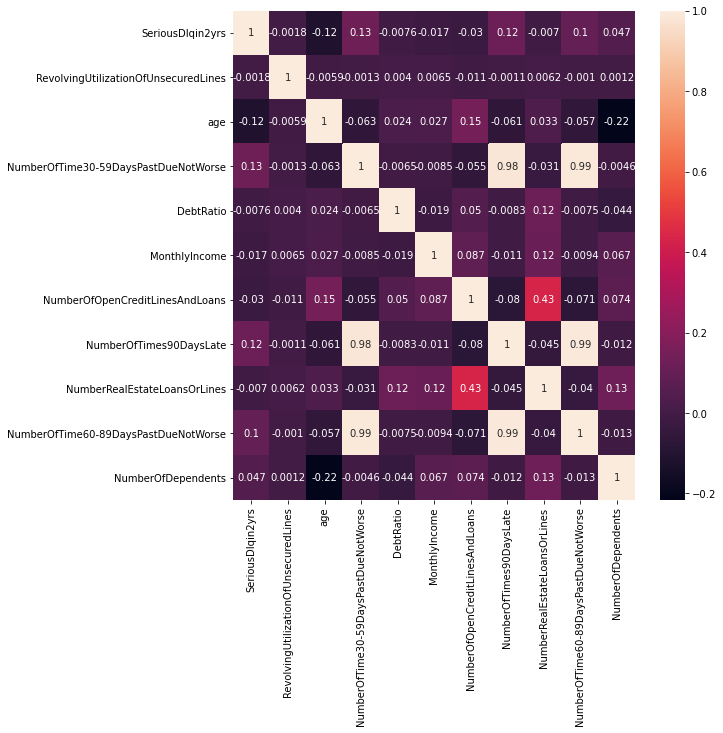

In [15]:
plt.figure(figsize=(9,9))
sn.heatmap(dataset.corr(), annot=True)
plt.show()

### From above heatmap we can see that the parameter 'NumberOfTime30-59DaysPastDueNotWorse' is highly correlated with 'NumberOfTimes90DaysLate' and 'NumberOfTime60-89DaysPastDueNotWorse'

In [16]:
dataset.drop(labels=['NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'], axis=1, inplace=True)

### SeriousDlqin2yrs vs Age 

### The relation of target variable with Age 

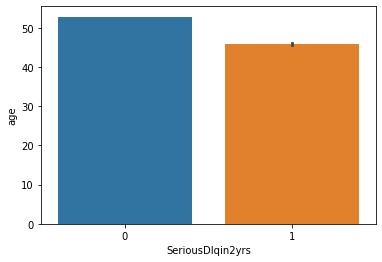

In [17]:
sn.barplot(x = dataset['SeriousDlqin2yrs'], y = dataset['age'])
plt.show()

### The relation of target variable with MonthlyIncome

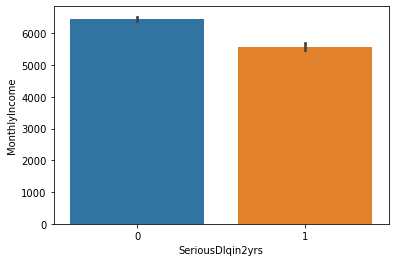

In [18]:
sn.barplot(x = dataset['SeriousDlqin2yrs'], y = dataset['MonthlyIncome'])
plt.show()

## Scaling The Data into Standard Form

In [24]:
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
Y = dataset['SeriousDlqin2yrs']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
data = sc_scale.fit_transform(X)

## Model Selection

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 10)

### Using Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_classify = RandomForestClassifier()
rf_classify.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy of Random Forest Model :-> ",accuracy_score(y_test, rf_classify.predict(X_test))*100,"%")

Accuracy of Random Forest Model :->  93.264 %


### Using XB Boost Classifier

In [29]:
import xgboost
xbg_classify = xgboost.XGBClassifier()
xbg_classify.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[10:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
print("Accuracy of XG Boost Model :-> ", accuracy_score(y_test, xbg_classify.predict(X_test))*100,"%")

Accuracy of XG Boost Model :->  93.29333333333332 %


#### Using Hyperparameter Optimization

In [31]:
hyper_param = {'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
    }

In [32]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xbg_classify,param_distributions=hyper_param,n_jobs=-1, scoring="roc_auc",cv=5, verbose=3, random_state=10)

In [33]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished
C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[10:23:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly 

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [34]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [35]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
print("Accuracy After Optimization :-> ", accuracy_score(y_test, random_search.predict(X_test))*100,"%")

Accuracy After Optimization :->  93.34933333333333 %


## Saving The Model to Disk

In [38]:
pickle.dump(random_search, open('model.pkl','wb'))